# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, probplot, shapiro, t, ttest_ind
from numpy.random import choice
from numpy import mean, std, sum, ndarray, empty, abs
from math import sqrt

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
sns.set()

# 1. Is the distribution of body temperatures normal?

graphical - histogram

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


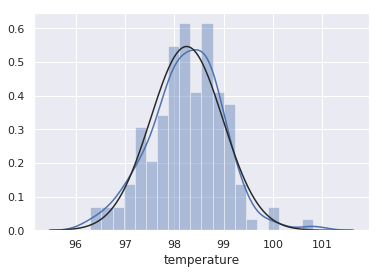

In [6]:
sns.distplot(df['temperature'], bins=20, fit=norm)

graphical - qq-plot

In [15]:
obs_mean = mean(df['temperature'])
obs_std = std(df['temperature'])
z = (df['temperature'] - obs_mean) / obs_std

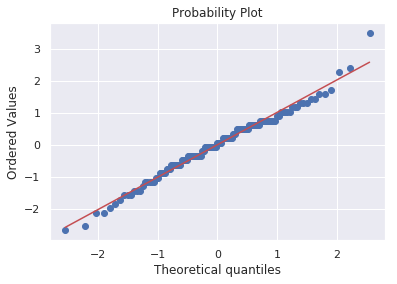

In [16]:
probplot(z, dist='norm', plot=plt)
plt.show()

non graphical - Shapiro-Wilk test

In [17]:
W, p = shapiro(df['temperature'])
print('test statistic W %f' % W)
print('p-value %f' % p)

test statistic W 0.986577
p-value 0.233175


Both graphical and Shapiro-Wilk tests suggest that the distribution is normal

# 2. Is the sample size large? Are the observations independent?

In [18]:
df['temperature'].size

130

Since the sample size is less that 10% of the population of humans, the observations can be assumed to be independent

# 3. Is the true population mean really 98.6 degrees F?

bootstrap hypothesis test

Null Hypothesis -> mean temperature is 98.6 F

significance level = 0.05


test statistic -> mean temperature

Assume Null Hypothesis is true

shift sample to population mean 98.6 and draw random samples with replacement

In [19]:
obs_mean = mean(df['temperature'])
print('observed mean %f' % obs_mean)
pop_mean = 98.6

observed mean 98.249231


In [20]:
shifted_temps = df['temperature'] - obs_mean + pop_mean

In [21]:
def get_bs_replicate(data, num_samples, repl_func):
    bs_reps = empty(num_samples)
    for i in range(num_samples):
        bs_sample =  choice(data, len(data))
        bs_reps[i] = repl_func(bs_sample)
    return bs_reps

In [22]:
bs_means = get_bs_replicate(data=shifted_temps, num_samples=10000, repl_func=mean)

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


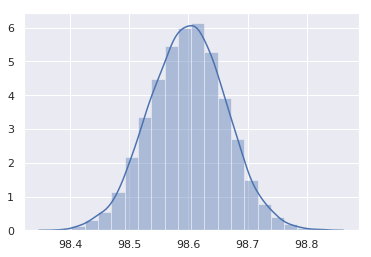

In [23]:
sns.distplot(bs_means, bins=20)

calculate p-value of obtaining a sample with mean = obs_mean from the above distribution

In [24]:
p_val = sum(bs_means <= obs_mean) / len(bs_means)

In [25]:
print('p value (of observing a mean <= %(mean)f assuming the null hypothesis is true) : %(p)f' 
      % {'mean': obs_mean, 'p':p_val})

p value (of observing a mean <= 98.249231 assuming the null hypothesis is true) : 0.000000


As p-value is < 0.05, the null hypothesis is rejected

therefore we cannot conclude that the population mean is 98.6 F

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

One-sample test is more appropriate here, as there is only one set of observations. 2-sample test is used when comparing two sets of observations

In this situation, is it appropriate to use the  t  or  z  statistic?

It is more appropriate to use the z-statistic in this case as the sample size (130) > 30 and the samplecan be assumed to have normal distribution. 

frequentist testing with z-statistic:

In [90]:
std_obs = std(df['temperature'])

In [91]:
n = len(df['temperature'])

In [79]:
std_approx = std_obs / sqrt(n)

In [92]:
z_stat = (obs_mean - pop_mean)/std_approx

In [93]:
p_val_z = norm.cdf(z_stat)

In [89]:
print('p value (of observing a mean <= %(mean)f assuming the null hypothesis is true) : %(p)f' 
      % {'mean': obs_mean, 'p':p_val_z})

p value (of observing a mean <= 98.249231 assuming the null hypothesis is true) : 0.000000


Again, this proves that we can reject the null hypothesis. 

therefore we cannot conclude that the population mean is 98.6 F

frequentist testing with t-statistic:

In [80]:
t_stat = (obs_mean - pop_mean)/std_approx

In [81]:
p_val_t = t.sf(abs(t_stat), n-1)

In [82]:
print('p value (of observing a mean <= %(mean)f assuming the null hypothesis is true) : %(p)f' 
      % {'mean': obs_mean, 'p':p_val_t})

p value (of observing a mean <= 98.249231 assuming the null hypothesis is true) : 0.000000


# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [94]:
sample = choice(df['temperature'], 10)

frequentist testing with z-statistic:

In [95]:
std_obs = std(sample)

In [98]:
obs_mean = mean(sample)

In [96]:
n = 10

In [99]:
std_approx = std_obs / sqrt(n)

In [100]:
z_stat = (obs_mean - pop_mean)/std_approx

In [101]:
p_val_z = norm.cdf(z_stat)

In [102]:
print('p value (of observing a mean <= %(mean)f assuming the null hypothesis is true) : %(p)f' 
      % {'mean': obs_mean, 'p':p_val_z})

p value (of observing a mean <= 98.530000 assuming the null hypothesis is true) : 0.339493


frequentist testing with t-statistic:

In [103]:
t_stat = (obs_mean - pop_mean)/std_approx

In [104]:
p_val_t = t.sf(abs(t_stat), n-1)

In [105]:
print('p value (of observing a mean <= %(mean)f assuming the null hypothesis is true) : %(p)f' 
      % {'mean': obs_mean, 'p':p_val_t})

p value (of observing a mean <= 98.530000 assuming the null hypothesis is true) : 0.344337


The t-statistic is more appropriate in this case as the sample size < 30

The null hypothesis cannot be rejected in this case, which means that we do not have enough evidence to say that the mean body temperature (population mean) is not equal to 98.6 F

t-statistic is more appropriate in cases where we cannot assume a normal distribution for the sample because the sample size is less than 30. The z-statistic, on the other hand can be used when the sample can be assumed to have a normal distribution

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

bootstrap method:

In [107]:
bs_means = get_bs_replicate(data=df['temperature'], num_samples=10000, repl_func=mean)

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


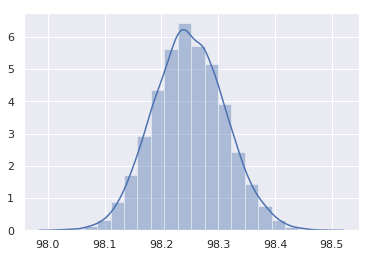

In [109]:
sns.distplot(bs_means, bins=20, norm_hist=True)

In [112]:
ci_bs = norm.interval(.95, loc=mean(bs_means), scale=std(bs_means))
print(ci_bs)

(98.12495798431607, 98.373275092607)


frequentist method:

In [113]:
obs_mean = mean(df['temperature'])

In [114]:
obs_std = std(df['temperature'])

In [117]:
z_range = norm.interval(.95, loc=0.0, scale=1.0)
print(z_range)

(-1.959963984540054, 1.959963984540054)


In [120]:
ci_fr = obs_mean + z_range[0] * obs_std , obs_mean + z_range[1] * obs_std
print(ci_fr)

(96.81775582674824, 99.68070571171332)


# 6. Is there a significant difference between males and females in normal temperature?

Null hypothesis -> There is no difference in the distribution of male and female body temperature. The means of both distributions are same

test statistic -> difference of means

assuming null hypothesis is true, the expected difference of means must be zero

In [125]:
obs_mean = mean(df['temperature'])

In [122]:
sample_males = df.loc[df['gender'] == 'M']['temperature']
sample_females = df.loc[df['gender'] == 'F']['temperature']

shift both samples to common mean

In [126]:
sample_males = sample_males - mean(sample_males) + obs_mean
sample_females = sample_females - mean(sample_females) + obs_mean

In [127]:
bs_means_males = get_bs_replicate(data=sample_males, num_samples=10000, repl_func=mean)
bs_means_females = get_bs_replicate(data=sample_females, num_samples=10000, repl_func=mean)

In [129]:
bs_means_diff = bs_means_males - bs_means_females

/home/siri/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


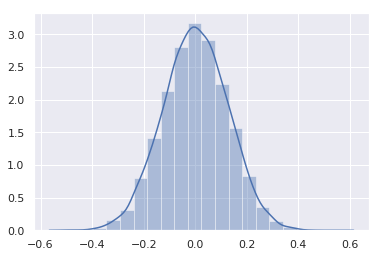

In [133]:
sns.distplot(bs_means_diff, bins=20, norm_hist=True)

In [135]:
obs_diff_mean = mean(sample_males) - mean(sample_females)
print(obs_diff_mean)

-2.842170943040401e-14


In [138]:
p_val_bs = sum(bs_means_diff <= obs_diff_mean) / len(bs_means_diff)
print(p_val_bs)

0.4987


as p_val > 0.05, the null hypothesis cannot be rejected. Therefore there is not enough evidence to say that there is a significant difference between male and female temperature

t-test:

In [140]:
t, p_val_t = ttest_ind(sample_males, sample_females)
print('t-statistic %(t)f and p value is %(p)f' % {'t':t, 'p': p_val_t})

t-statistic -0.000000 and p value is 1.000000
